# RSNA - Exploratory Data Analysis Part 3

In this notebook, we are going to take a look at some of the DICOM images.  

We will use the window center, window width, rescale intercept and rescale slope to process each image.

We will look at images of different types of hemorrhage.

In [1]:
import pandas as pd
import pickle
import os
import sys

import numpy as np
import pydicom

import matplotlib.pyplot as plt

In [2]:
img_dir = "stage_1_train_images/"

In [3]:
data_table = pd.read_pickle('rsna_data_table.pkl') 
print(len(data_table))

674258


In [4]:
dicom_table = pd.read_pickle('rsna_dicom_table.pkl') 
print(len(dicom_table))

674258


# 1. Look at some of the images with the specified window

In [5]:
def apply_window(pixel_data, rescale_slope, rescale_intercept, window_center, window_width):
        
        
        pixel_data = pixel_data*rescale_slope + rescale_intercept
        data_min = window_center - window_width//2
        data_max = window_center + window_width//2
        
        pixel_data[pixel_data < data_min] = data_min
        pixel_data[pixel_data > data_max] = data_max
        
        pixel_data = (pixel_data - pixel_data.min())/(pixel_data.max()-pixel_data.min())*255
        
        return np.uint8(pixel_data)    

In [6]:
def plot_images(width, height, data_table, dicom_table, img_dir, diagnosis):

    fig, axs = plt.subplots(width, height,figsize=(12,12))

    data = data_table[data_table["any"] == 0][0:width*height]
    
    if diagnosis != "normal":   
        print('a')
        data = data_table[data_table[diagnosis] == 1][0:width*height]

    for ind in range(0, width*height):
        img_id = data.index[ind]   
        file_name = os.path.join(img_dir,"ID_"+img_id+".dcm")
        ds = pydicom.dcmread(file_name)
    
        window_width = dicom_table.loc[img_id]['window width']
        window_center = dicom_table.loc[img_id]['window center']
    
        if isinstance(window_width, list):
            window_width = window_width[0]
        
        if isinstance(window_center, list):
            window_center = window_center[0]
        
        rescale_intercept = dicom_table.loc[img_id]['rescale intercept']
        rescale_slope = dicom_table.loc[img_id]['rescale slope']  
    
        img = apply_window(ds.pixel_array, rescale_slope, rescale_intercept, window_center, window_width)
    
        i = ind // width
        j = ind % width
    
        axs[i,j].imshow(img, cmap=plt.cm.bone) 
        axs[i,j].axis('off')
    
        axs[i,j].set_title(diagnosis)
        

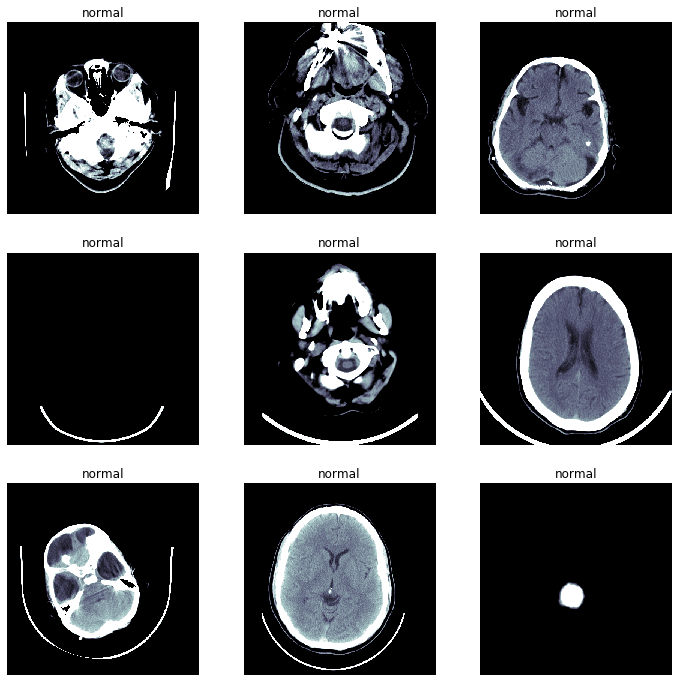

In [7]:
#Change 'diagnosis' to see different images
plot_images(3,3, data_table, dicom_table, img_dir, diagnosis ='normal')

a


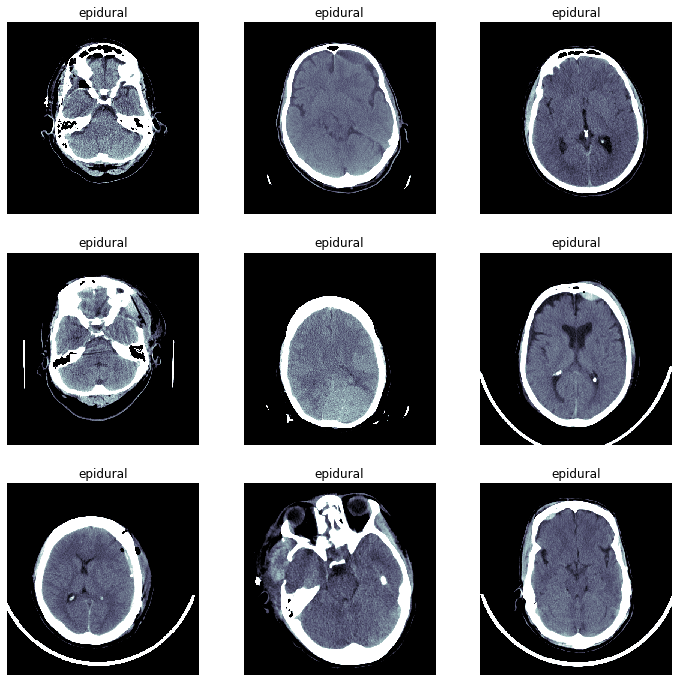

In [8]:
#Change 'diagnosis' to see different images
plot_images(3,3, data_table, dicom_table, img_dir, diagnosis ='epidural')

a


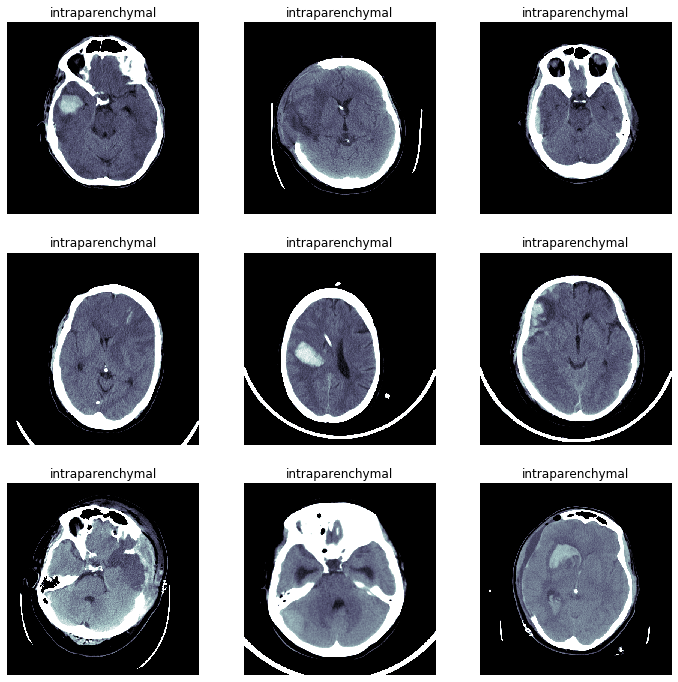

In [9]:
#Change 'diagnosis' to see different images
plot_images(3,3, data_table, dicom_table, img_dir, diagnosis ='intraparenchymal')

a


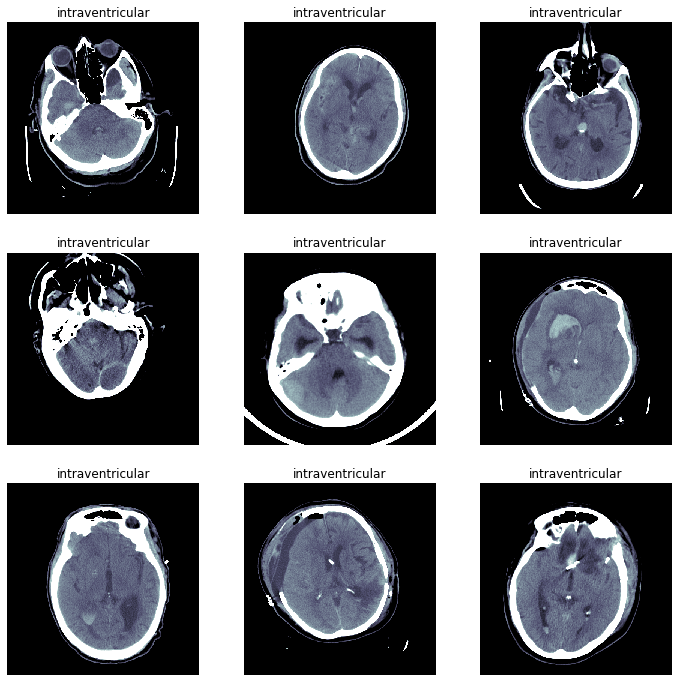

In [10]:
#Change 'diagnosis' to see different images
plot_images(3,3, data_table, dicom_table, img_dir, diagnosis ='intraventricular')

a


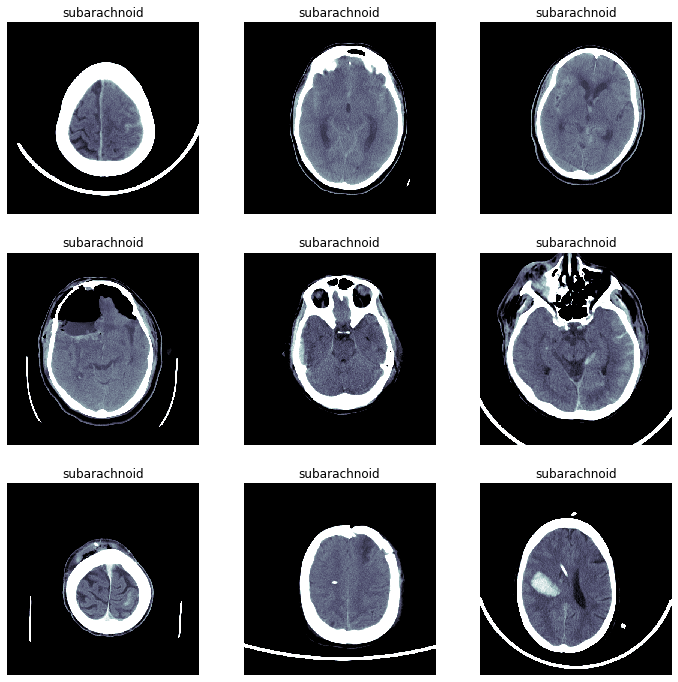

In [11]:
#Change 'diagnosis' to see different images
plot_images(3,3, data_table, dicom_table, img_dir, diagnosis ='subarachnoid')

a


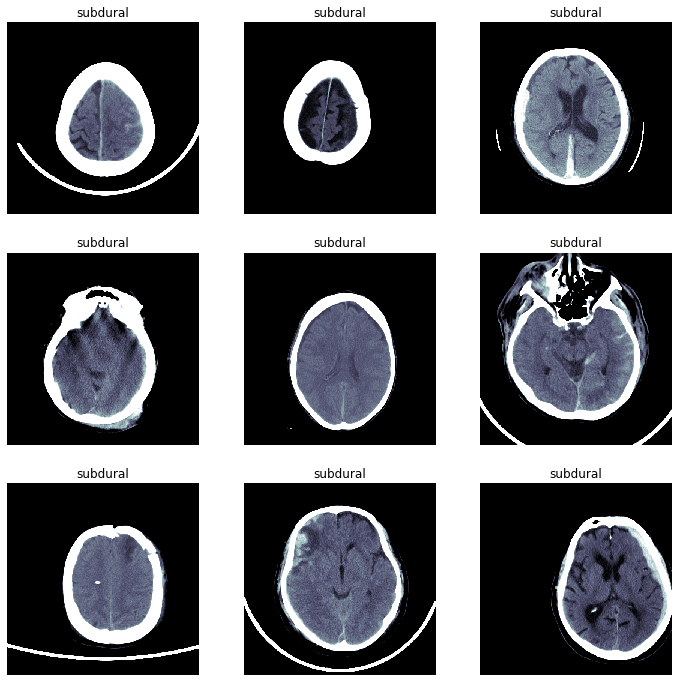

In [12]:
#Change 'diagnosis' to see different images
plot_images(3,3, data_table, dicom_table, img_dir, diagnosis ='subdural')